## Repeated k-Fold Cross-Validation for Model Evaluation

In [1]:
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [2]:
def evaluate_model(X, y, repeats):
    cv = RepeatedKFold(n_splits = 10, n_repeats = repeats, random_state = 1)
    model = LogisticRegression()
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
    return scores

In [3]:
X, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 15, n_redundant = 5, random_state = 1)
repeats = range(1,16)
result = list()
for r in repeats:
    scores = evaluate_model(X, y, r)
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    result.append(scores)

>1 mean=0.8680 se=0.011
>2 mean=0.8675 se=0.008
>3 mean=0.8673 se=0.006
>4 mean=0.8670 se=0.006
>5 mean=0.8658 se=0.005
>6 mean=0.8655 se=0.004
>7 mean=0.8651 se=0.004
>8 mean=0.8651 se=0.004
>9 mean=0.8656 se=0.003
>10 mean=0.8658 se=0.003
>11 mean=0.8655 se=0.003
>12 mean=0.8654 se=0.003
>13 mean=0.8652 se=0.003
>14 mean=0.8651 se=0.003
>15 mean=0.8653 se=0.003


Here we can see the default choice of one repeat can be optimistic as it has accuracy of 86.80% which decreases with increases in number of repeats. 

We can see that the mean seems to coalesce around a value of about 86.5 percent. We might take this as the stable estimate of model performance and in turn, choose 5 or 6 repeats that seem to approximate this value first.

We can also see the decrease in the value of error which stablizes from 9th repeat whereas we can see that 5 repeats have se = 0.005 and can thus be considered as better.

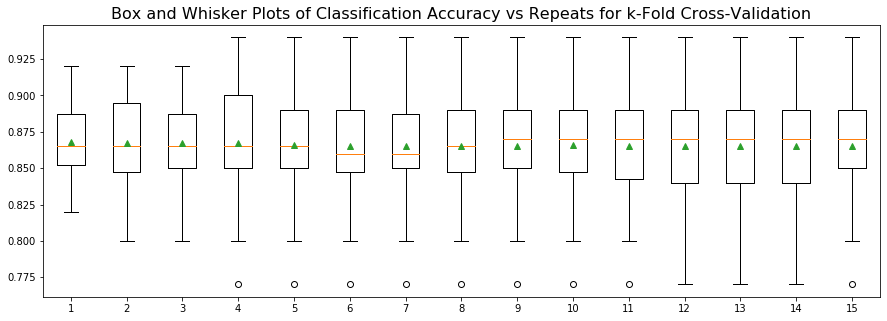

In [4]:
pyplot.figure(figsize = (15,5))
pyplot.boxplot(result, labels=[str(r) for r in repeats], showmeans=True)
pyplot.title("Box and Whisker Plots of Classification Accuracy vs Repeats for k-Fold Cross-Validation", size = 16)
pyplot.show()

A box and whisker's plot is created to summarise the distribution score for each number of repeats. 

The orange line represents the median and the green triangle is the mean. If both the line and the triangle are coincident then it implies a symmetric distribution and that the mean may capture central tendency well.

This might provide an additional heuristic for choosing an appropriate number of repeats for your test harness.

Taking this into consideration, using five repeats with this chosen test harness and algorithm appears to be a good choice.